In [1]:
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Automotive.json.gz')

# Display the DataFrame
df

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A26FXHGNE8HHIU,"December 29, 2014",Will these fit my 2002 Ford F150 XLT?,"[{'answerText': 'It's all custom mounting, whe...",B000182CPM
1,yes/no,A365S8H55GGXPD,"July 19, 2013",is the hardware for installation included,[{'answerText': 'It's been a while since I ins...,B000182CPM
2,yes/no,A365S8H55GGXPD,"July 19, 2013",will they fit 2013 f350 dually,"[{'answerText': 'Not sure, maybe measuring wid...",B000182CPM
3,open-ended,A1TI7MZLZSEO4I,"November 2, 2014",I had AVS shades on my 1st Magnum and they mad...,"[{'answerText': 'Unfortunately, they kept send...",B000182F0Y
4,open-ended,A34HIGY3TJETSP,"July 10, 2014",what color are they? Want dark gray,[{'answerText': 'VERY dark gray...almost black...,B000182F0Y
...,...,...,...,...,...,...
59410,open-ended,A2W5I6YM19K91L,"March 1, 2015","Would these work with a 50"" curved light bar?",[{'answerText': 'I believe you may have to inc...,B00IX26X12
59411,yes/no,A06716603HLY4PBZZ4CZS,"February 12, 2015",will this fit my 2001 chevy silverado 2500hd c...,[{'answerText': 'Made for 2007- up . but does ...,B00IX26X12
59412,open-ended,A28RLWN4NUAN6W,"January 29, 2015",i have a 03 Silverado 1500 4WD will this produ...,[{'answerText': 'bolt anchors are not expandin...,B00IX26X12
59413,open-ended,AT7EA2M8IP3VS,"January 19, 2015",Will this kit work on my 2014 Tacoma? Thanks,[{'answerText': 'I do not think that it will. ...,B00IX26X12


In [3]:
first_row = df.iloc[0]
print(first_row)


,asin,questions
0,B000182CPM,"[{'questionType': 'open-ended', 'askerID': 'A2..."
1,B000182F0Y,"[{'questionType': 'open-ended', 'askerID': 'A1..."
2,B0001EW044,"[{'questionType': 'open-ended', 'askerID': 'A2..."
3,B00020BM32,"[{'questionType': 'open-ended', 'askerID': 'A2..."
4,B00027GTYC,"[{'questionType': 'open-ended', 'askerID': 'A1..."


In [4]:
df.describe()

<bound method DataFrame.info of              asin                                          questions
0      B000182CPM  [{'questionType': 'open-ended', 'askerID': 'A2...
1      B000182F0Y  [{'questionType': 'open-ended', 'askerID': 'A1...
2      B0001EW044  [{'questionType': 'open-ended', 'askerID': 'A2...
3      B00020BM32  [{'questionType': 'open-ended', 'askerID': 'A2...
4      B00027GTYC  [{'questionType': 'open-ended', 'askerID': 'A1...
...           ...                                                ...
10572  B00HASW274  [{'questionType': 'open-ended', 'askerID': 'A1...
10573  B00HJEUUKU  [{'questionType': 'open-ended', 'askerID': 'A1...
10574  B00HRZVC6W  [{'questionType': 'open-ended', 'askerID': 'A2...
10575  B00HYHW2X0  [{'questionType': 'open-ended', 'askerID': 'A1...
10576  B00IX26X12  [{'questionType': 'open-ended', 'askerID': 'A2...

[10577 rows x 2 columns]>

In [5]:
#Distribution of question type
df['questionType'].value_counts()

asin                                                B000182CPM
questions    [{'questionType': 'open-ended', 'askerID': 'A2...
Name: 0, dtype: object

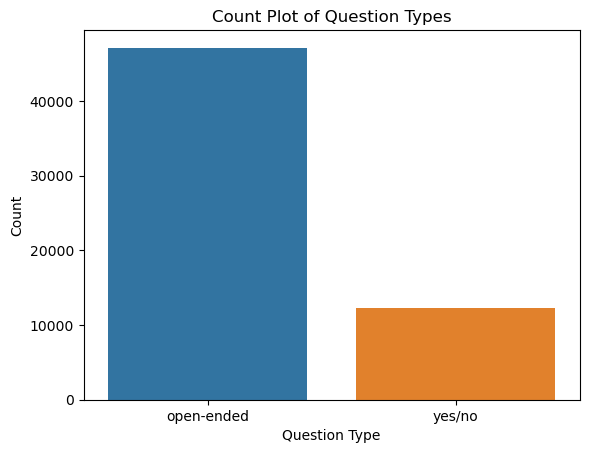

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.countplot(x='questionType', data=df)
plt.title('Count Plot of Question Types')
plt.xlabel('Question Type')
plt.ylabel('Count')
plt.show()

In [3]:
df['asin'].value_counts()

B00IX26X12    10
B007ZGFYE4    10
B009IFIB0Y    10
B005WXDPHK    10
B006PPM6CO    10
              ..
B007Y85GH8     1
B00803BKOO     1
B00F05VDVU     1
B00EAR0Z04     1
B0085IJZ6E     1
Name: asin, Length: 10577, dtype: int64

In [4]:
unique_values = df['asin'].unique()
print(unique_values)

['B000182CPM' 'B000182F0Y' 'B0001EW044' ... 'B00HRZVC6W' 'B00HYHW2X0'
 'B00IX26X12']


In [18]:
# Example: Word cloud for 'questionText'
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['questionText'])
wordcloud = WordCloud(width=800, height=400, random_state=42).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [32]:
df.columns

Index(['questionType', 'askerID', 'questionTime', 'questionText', 'answers',
       'asin', 'year', 'month', 'day_of_week'],
      dtype='object')

In [20]:
# To find distribution of askerID to see the frequent question askers
df['askerID'].value_counts()

A2UKWTZZNIAAJW    19
A4OA8626Y7RLI     16
A1F9Z42CFF9IAY    16
AGQLULW2BB3ZQ     13
AB3BJMVM5QG5V     13
                  ..
A21A2YVVTMTE8      1
A3HX5QEI860IQ3     1
A3Q7LWDMD7JWV3     1
A7S0TKGM2BTKF      1
A2F6DXZ8FGMX2A     1
Name: askerID, Length: 53524, dtype: int64

In [21]:
#import pandas as pd

# Assuming df is your DataFrame with the 'questionTime' column
df['questionTime'] = pd.to_datetime(df['questionTime'], format='%B %d, %Y', errors='coerce')

# Drop rows with NaT (Not a Time) values after conversion
df = df.dropna(subset=['questionTime'])

# Extract relevant temporal features
df['year'] = df['questionTime'].dt.year
df['month'] = df['questionTime'].dt.month
df['day_of_week'] = df['questionTime'].dt.day_of_week

# Display the DataFrame
print(df)


      questionType                askerID questionTime  \
0       open-ended         A26FXHGNE8HHIU   2014-12-29   
1           yes/no         A365S8H55GGXPD   2013-07-19   
2           yes/no         A365S8H55GGXPD   2013-07-19   
3       open-ended         A1TI7MZLZSEO4I   2014-11-02   
4       open-ended         A34HIGY3TJETSP   2014-07-10   
...            ...                    ...          ...   
59410   open-ended         A2W5I6YM19K91L   2015-03-01   
59411       yes/no  A06716603HLY4PBZZ4CZS   2015-02-12   
59412   open-ended         A28RLWN4NUAN6W   2015-01-29   
59413   open-ended          AT7EA2M8IP3VS   2015-01-19   
59414   open-ended         A2F6DXZ8FGMX2A   2015-05-24   

                                            questionText  \
0                  Will these fit my 2002 Ford F150 XLT?   
1              is the hardware for installation included   
2                         will they fit 2013 f350 dually   
3      I had AVS shades on my 1st Magnum and they mad...   
4  

C:\Users\hp\AppData\Local\Temp\ipykernel_2156\1690566529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['questionTime'] = pd.to_datetime(df['questionTime'], format='%B %d, %Y', errors='coerce')


In [22]:
df

,questionType,askerID,questionTime,questionText,answers,asin,year,month,day_of_week
0,open-ended,A26FXHGNE8HHIU,2014-12-29,Will these fit my 2002 Ford F150 XLT?,"[{'answerText': 'It's all custom mounting, whe...",B000182CPM,2014,12,0
1,yes/no,A365S8H55GGXPD,2013-07-19,is the hardware for installation included,[{'answerText': 'It's been a while since I ins...,B000182CPM,2013,7,4
2,yes/no,A365S8H55GGXPD,2013-07-19,will they fit 2013 f350 dually,"[{'answerText': 'Not sure, maybe measuring wid...",B000182CPM,2013,7,4
3,open-ended,A1TI7MZLZSEO4I,2014-11-02,I had AVS shades on my 1st Magnum and they mad...,"[{'answerText': 'Unfortunately, they kept send...",B000182F0Y,2014,11,6
4,open-ended,A34HIGY3TJETSP,2014-07-10,what color are they? Want dark gray,[{'answerText': 'VERY dark gray...almost black...,B000182F0Y,2014,7,3
...,...,...,...,...,...,...,...,...,...
59410,open-ended,A2W5I6YM19K91L,2015-03-01,"Would these work with a 50"" curved light bar?",[{'answerText': 'I believe you may have to inc...,B00IX26X12,2015,3,6
59411,yes/no,A06716603HLY4PBZZ4CZS,2015-02-12,will this fit my 2001 chevy silverado 2500hd c...,[{'answerText': 'Made for 2007- up . but does ...,B00IX26X12,2015,2,3
59412,open-ended,A28RLWN4NUAN6W,2015-01-29,i have a 03 Silverado 1500 4WD will this produ...,[{'answerText': 'bolt anchors are not expandin...,B00IX26X12,2015,1,3
59413,open-ended,AT7EA2M8IP3VS,2015-01-19,Will this kit work on my 2014 Tacoma? Thanks,[{'answerText': 'I do not think that it will. ...,B00IX26X12,2015,1,0


In [23]:
# Assuming your existing DataFrame is named 'original_df'
#original_df = ...

# Create a new DataFrame with only 'questionText' and 'answers'
new_df = df[['questionText', 'answers']].copy()

# Display the new DataFrame
print(new_df.head())


                                        questionText  \
0              Will these fit my 2002 Ford F150 XLT?   
1          is the hardware for installation included   
2                     will they fit 2013 f350 dually   
3  I had AVS shades on my 1st Magnum and they mad...   
4               what color are they?  Want dark gray   

                                             answers  
0  [{'answerText': 'It's all custom mounting, whe...  
1  [{'answerText': 'It's been a while since I ins...  
2  [{'answerText': 'Not sure, maybe measuring wid...  
3  [{'answerText': 'Unfortunately, they kept send...  
4  [{'answerText': 'VERY dark gray...almost black...  


In [24]:
# Assuming your DataFrame is named 'original_df'
#original_df = ...

# Create a new DataFrame with only 'questionText' and 'answers'
new_df = df[['questionText', 'answers']].copy()

# Reset the index if needed
new_df = new_df.reset_index()

# Display the new DataFrame
print(new_df.head())

   index                                       questionText  \
0      0              Will these fit my 2002 Ford F150 XLT?   
1      1          is the hardware for installation included   
2      2                     will they fit 2013 f350 dually   
3      3  I had AVS shades on my 1st Magnum and they mad...   
4      4               what color are they?  Want dark gray   

                                             answers  
0  [{'answerText': 'It's all custom mounting, whe...  
1  [{'answerText': 'It's been a while since I ins...  
2  [{'answerText': 'Not sure, maybe measuring wid...  
3  [{'answerText': 'Unfortunately, they kept send...  
4  [{'answerText': 'VERY dark gray...almost black...  


In [36]:
df1 = df.drop(columns=['questionTime', 'askerID', 'asin', 'year', 'month', 'day_of_week'])

In [37]:
df1

,questionType,questionText,answers
0,open-ended,Will these fit my 2002 Ford F150 XLT?,"[{'answerText': 'It's all custom mounting, whe..."
1,yes/no,is the hardware for installation included,[{'answerText': 'It's been a while since I ins...
2,yes/no,will they fit 2013 f350 dually,"[{'answerText': 'Not sure, maybe measuring wid..."
3,open-ended,I had AVS shades on my 1st Magnum and they mad...,"[{'answerText': 'Unfortunately, they kept send..."
4,open-ended,what color are they? Want dark gray,[{'answerText': 'VERY dark gray...almost black...
...,...,...,...
59410,open-ended,"Would these work with a 50"" curved light bar?",[{'answerText': 'I believe you may have to inc...
59411,yes/no,will this fit my 2001 chevy silverado 2500hd c...,[{'answerText': 'Made for 2007- up . but does ...
59412,open-ended,i have a 03 Silverado 1500 4WD will this produ...,[{'answerText': 'bolt anchors are not expandin...
59413,open-ended,Will this kit work on my 2014 Tacoma? Thanks,[{'answerText': 'I do not think that it will. ...


In [38]:
df1['answerText'] = df1['answers'].apply(lambda x: x[0]['answerText'] if x else None)

# Drop the 'answers' column
df1 = df1.drop(columns=['answers'])

In [39]:
df1

,questionType,questionText,answerText
0,open-ended,Will these fit my 2002 Ford F150 XLT?,"It's all custom mounting, where there's a will..."
1,yes/no,is the hardware for installation included,"It's been a while since I installed them, but ..."
2,yes/no,will they fit 2013 f350 dually,"Not sure, maybe measuring width of wheels and ..."
3,open-ended,I had AVS shades on my 1st Magnum and they mad...,"Unfortunately, they kept sending the wrong siz..."
4,open-ended,what color are they? Want dark gray,VERY dark gray...almost black.
...,...,...,...
59410,open-ended,"Would these work with a 50"" curved light bar?",I believe you may have to increase the angle a...
59411,yes/no,will this fit my 2001 chevy silverado 2500hd c...,Made for 2007- up . but does fit on older mode...
59412,open-ended,i have a 03 Silverado 1500 4WD will this produ...,bolt anchors are not expanding properly when t...
59413,open-ended,Will this kit work on my 2014 Tacoma? Thanks,I do not think that it will. The brakets are a...
